In [15]:
import pandas as pd
import matplotlib.pylab as plt
import matplotlib.colors as mcolors
from matplotlib import font_manager, rc
import matplotlib.font_manager as fm
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

plt.rcParams['axes.unicode_minus'] = False

import seaborn as sns
import numpy as np

In [17]:
df = pd.read_pickle("C:/ZIPcoding/dataset_final_jjin_0224.pkl")

In [7]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# NaN 값을 각 컬럼의 평균값으로 대체
cols = ['건물면적평균_3개월', '중앙값건물면적_3개월', '건물면적표준편차_3개월']
df[cols] = df[cols].apply(lambda x: x.fillna(x.mean()))


# 1. 데이터 정규화 (PCA는 변수의 스케일 영향을 받으므로 StandardScaler 사용)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['건물면적평균_3개월', '중앙값건물면적_3개월', '건물면적표준편차_3개월']])

# 2. PCA 적용 (1개의 주성분 유지)
pca = PCA(n_components=1)
df['건물면적_PCA_3개월'] = pca.fit_transform(scaled_data)

# 3. 기존 변수 삭제 (선택 사항)
df.drop(['건물면적평균_3개월', '중앙값건물면적_3개월', '건물면적표준편차_3개월'], axis=1, inplace=True)

In [19]:
# 사용할 명목형 컬럼 선택 (원-핫 인코딩할 변수들)
categorical_columns = ["서울5대학군지여부", "한강변여부"] 

# One-Hot Encoding (더미 변수 변환)
df_encoded = pd.get_dummies(df, columns=categorical_columns, drop_first=True)

In [20]:
df_encoded['서울5대학군지여부_1'] = df_encoded['서울5대학군지여부_1'].astype(int)
df_encoded['한강변여부_1'] = df_encoded['한강변여부_1'].astype(int)

In [13]:
#df_encoded.to_pickle("C:/ZIPcoding/final_encoded_df.pkl")

In [23]:
df_for_modeling = df_encoded.loc[(df['계약일'] <= '2024-08-12')]

In [25]:
df_for_modeling

,자치구코드,법정동코드,전체코드,자치구명,법정동명,자치구법정동,계약일,평당가격,실거래가,geometry,...,고정형주택담보대출,단독다가구,아파트,연립다세대,오피스텔,건축년도평균,건축년도중앙값,건축년도표준편차,서울5대학군지여부_1,한강변여부_1
38234,11710,10700,1171010700,송파구,가락동,송파구 가락동,2024-08-12,5320.806583,119833,"POLYGON ((210866.983 444741.855, 210950.913 44...",...,3.49,0,6,0,0,1966.073406,2005.0,279.235413,0,0
38235,11650,10800,1165010800,서초구,서초동,서초구 서초동,2024-08-12,6437.567483,179583,"POLYGON ((202095.233 444696.065, 202376.333 44...",...,3.49,0,4,0,2,2002.218846,2005.0,79.337158,1,0
38236,11650,10800,1165010800,서초구,서초동,서초구 서초동,2024-08-12,6437.567483,179583,"POLYGON ((202095.233 444696.065, 202376.333 44...",...,3.49,0,4,0,2,2002.218846,2005.0,79.337158,1,0
38237,11170,13100,1117013100,용산구,한남동,용산구 한남동,2024-08-12,6529.854650,279750,"POLYGON ((199456.074 448413.301, 199459.477 44...",...,3.49,0,0,2,0,2002.773196,2004.0,12.491157,0,0
38238,11170,13100,1117013100,용산구,한남동,용산구 한남동,2024-08-12,6529.854650,279750,"POLYGON ((199456.074 448413.301, 199459.477 44...",...,3.49,0,0,2,0,2002.773196,2004.0,12.491157,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
515078,11740,10900,1174010900,강동구,천호동,강동구 천호동,2020-01-01,3258.722800,60000,"POLYGON ((212438.023 449846.405, 212441.023 44...",...,2.42,0,1,0,0,2000.409442,2015.0,146.339179,0,1
515079,11440,11400,1144011400,마포구,창전동,마포구 창전동,2020-01-01,3301.553700,85000,"POLYGON ((193686.353 449268.218, 193686.839 44...",...,2.42,0,1,0,0,2005.379200,2005.0,7.191645,0,1
515080,11350,10400,1135010400,노원구,하계동,노원구 하계동,2020-01-01,2544.444400,45800,"POLYGON ((206778.261 460396.999, 206813.167 46...",...,2.42,0,1,0,0,1991.980269,1989.0,5.980557,0,0
515081,11530,10200,1153010200,구로구,구로동,구로구 구로동,2020-01-01,2217.640940,48700,"POLYGON ((188204.903 443713.705, 188206.823 44...",...,2.42,0,4,1,0,2002.491183,2003.0,24.046963,0,0


In [148]:
df_for_modeling.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Index: 476849 entries, 38234 to 515082
Data columns (total 64 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   자치구코드          476849 non-null  int32         
 1   법정동코드          476849 non-null  int32         
 2   전체코드           476849 non-null  object        
 3   자치구명           476849 non-null  object        
 4   법정동명           476849 non-null  object        
 5   자치구법정동         476849 non-null  object        
 6   계약일            476849 non-null  datetime64[ns]
 7   평당가격           476849 non-null  float64       
 8   실거래가           476849 non-null  int32         
 9   geometry       476849 non-null  geometry      
 10  포함지하철역         476849 non-null  object        
 11  환승역개수          476849 non-null  int64         
 12  일반역개수          476849 non-null  int64         
 13  1호선개수          476849 non-null  int64         
 14  2호선개수          476849 non-null  int64        

In [150]:
df_encoded.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 515083 entries, 0 to 515082
Data columns (total 64 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   자치구코드          515083 non-null  int32         
 1   법정동코드          515083 non-null  int32         
 2   전체코드           515083 non-null  object        
 3   자치구명           515083 non-null  object        
 4   법정동명           515083 non-null  object        
 5   자치구법정동         515083 non-null  object        
 6   계약일            515083 non-null  datetime64[ns]
 7   평당가격           515083 non-null  float64       
 8   실거래가           515083 non-null  int32         
 9   geometry       515083 non-null  geometry      
 10  포함지하철역         515083 non-null  object        
 11  환승역개수          515083 non-null  int64         
 12  일반역개수          515083 non-null  int64         
 13  1호선개수          515083 non-null  int64         
 14  2호선개수          515083 non-null  int64       

In [27]:
# 컬럼 선택 PCA 전
numeric_col = ['평당가격','실거래가','환승역개수','일반역개수', '1호선개수', '2호선개수', '3호선개수','4호선개수', '5호선개수', '6호선개수',
                 '7호선개수','8호선개수','9호선개수','경의중앙선개수','경춘선개수','공항철도개수','수인분당선개수','신분당선개수','우이신설선개수',
                 '신림선개수','GTX-A개수','평당가격평균_3개월','실거래가평균_3개월','평균거래량_3개월','평당가격중앙값_3개월','실거래가중앙값_3개월',
                 '건물면적평균_3개월', '중앙값건물면적_3개월', '건물면적표준편차_3개월','토지면적평균_3개월','토지면적중앙값_3개월','토지면적표준편차_3개월',
                 '층평균_3개월','층중앙값_3개월','층표준편차_3개월','층평균_6개월','층중앙값_6개월','층표준편차_6개월','수도권아파트입주물량','평당가격_6개월후',
                 '기준금리', '고정형주택담보대출', '단독다가구', '아파트', '연립다세대', '오피스텔', '건축년도평균', '건축년도중앙값', '건축년도표준편차']

In [197]:
# 컬럼 선택 PCA 후
numeric_col = ['평당가격','실거래가','환승역개수','일반역개수', '1호선개수', '2호선개수', '3호선개수','4호선개수', '5호선개수', '6호선개수',
                 '7호선개수','8호선개수','9호선개수','경의중앙선개수','경춘선개수','공항철도개수','수인분당선개수','신분당선개수','우이신설선개수',
                 '신림선개수','GTX-A개수','실거래가평균_3개월','평균거래량_3개월','평당가격_PCA_3개월','실거래가중앙값_3개월',
                 '건물면적_PCA_3개월','토지면적평균_3개월','토지면적중앙값_3개월','토지면적표준편차_3개월',
                 '층평균_3개월','층중앙값_3개월','층표준편차_3개월','층평균_6개월','층중앙값_6개월','층표준편차_6개월','수도권아파트입주물량','평당가격_6개월후',
                 '기준금리', '고정형주택담보대출', '단독다가구', '아파트', '연립다세대', '오피스텔', '건축년도평균', '건축년도중앙값', '건축년도표준편차']

In [29]:
encoded_col = ['서울5대학군지여부_1', '한강변여부_1']

# 인코딩된 데이터에서 분석할 컬럼 선택
selected_df = df_encoded[numeric_col + encoded_col]

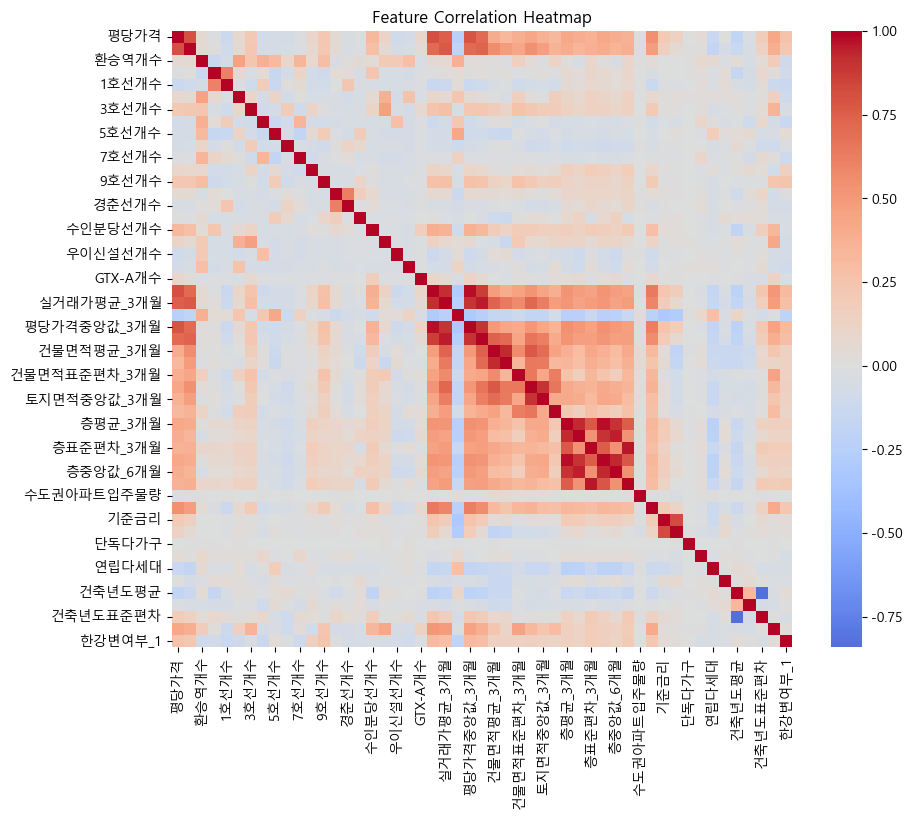

In [17]:

# 인코딩된 데이터에서 분석할 컬럼 선택
selected_df = df_encoded[numeric_col + encoded_col]

# 상관계수 계산
correlation_matrix = selected_df.corr()

# '평당가격_6개월후' 와의 상관관계 추출
target_correlation = correlation_matrix["평당가격_6개월후"].sort_values(ascending=False)

# 상관관계 히트맵 시각화
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, cmap='coolwarm', center=0, annot=False)
plt.title("Feature Correlation Heatmap")
plt.show()

6개월 후 평당가격과 상관관계가 높은 변수 (Top 10)
평당가격_6개월후      1.000000
평당가격평균_3개월     0.643476
평당가격중앙값_3개월    0.622148
실거래가평균_3개월     0.592088
실거래가중앙값_3개월    0.551730
평당가격           0.541161
실거래가           0.477476
서울5대학군지여부_1    0.403370
토지면적평균_3개월     0.361015
층평균_3개월        0.343931
Name: 평당가격_6개월후, dtype: float64

6개월 후 평당가격과 상관관계가 낮은 변수 (Bottom 10)
6호선개수       -0.049157
오피스텔        -0.050437
5호선개수       -0.052949
신림선개수       -0.066178
4호선개수       -0.079192
우이신설선개수     -0.093523
연립다세대       -0.117348
건축년도평균      -0.122921
1호선개수       -0.124423
평균거래량_3개월   -0.223498
Name: 평당가격_6개월후, dtype: float64


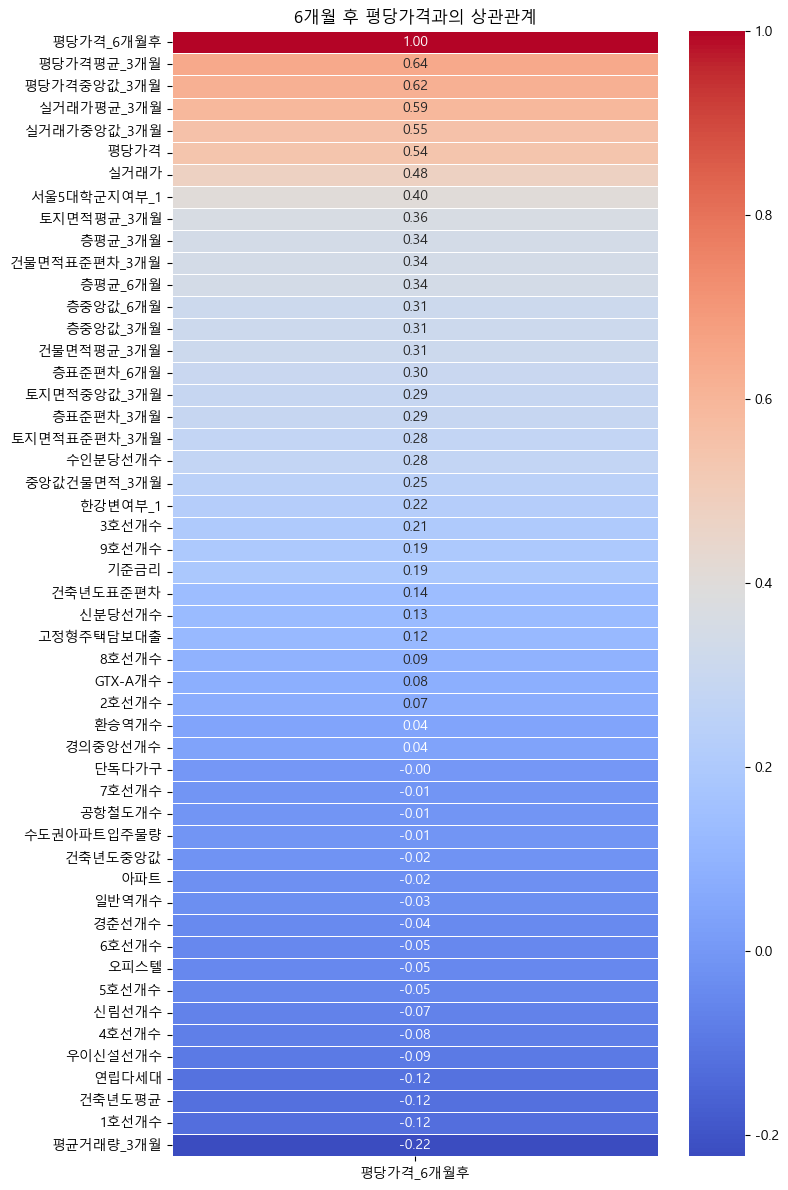

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt


# 원-핫 인코딩된 변수 포함하여 상관 행렬 계산
correlation_with_price = selected_df.corr()["평당가격_6개월후"].sort_values(ascending=False)

# 상위 10개 & 하위 10개 변수 출력
top_10_corr = correlation_with_price.head(10)
bottom_10_corr = correlation_with_price.tail(10)

# 상관분석 결과 출력
print("6개월 후 평당가격과 상관관계가 높은 변수 (Top 10)")
print(top_10_corr)
print("\n6개월 후 평당가격과 상관관계가 낮은 변수 (Bottom 10)")
print(bottom_10_corr)

# 상관관계 시각화 (히트맵)
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("6개월 후 평당가격과의 상관관계")
plt.tight_layout()
plt.savefig("C:/ZIPcoding/plots/상관계수_PCA전.png", dpi=500)
plt.show()



In [25]:
correlation_with_price

평당가격_6개월후       1.000000
평당가격평균_3개월      0.646839
평당가격중앙값_3개월     0.625402
실거래가평균_3개월      0.595352
실거래가중앙값_3개월     0.554987
평당가격            0.543389
실거래가            0.479644
서울5대학군지여부_1     0.405040
토지면적평균_3개월      0.362410
층평균_3개월         0.345571
건물면적표준편차_3개월    0.344342
층평균_6개월         0.344178
층중앙값_6개월        0.316181
층중앙값_3개월        0.315773
건물면적평균_3개월      0.314506
층표준편차_6개월       0.299810
토지면적중앙값_3개월     0.293767
층표준편차_3개월       0.293025
수인분당선개수         0.276693
토지면적표준편차_3개월    0.276422
중앙값건물면적_3개월     0.250017
한강변여부_1         0.223382
3호선개수           0.205210
9호선개수           0.195396
기준금리            0.190083
건축년도표준편차        0.138367
신분당선개수          0.128435
고정형주택담보대출       0.122034
8호선개수           0.094349
GTX-A개수         0.081915
2호선개수           0.072877
환승역개수           0.042355
경의중앙선개수         0.038246
단독다가구          -0.001688
공항철도개수         -0.008900
7호선개수          -0.009080
수도권아파트입주물량     -0.011797
건축년도중앙값        -0.015705
아파트            -0.024211
일반역개수          -0.031912


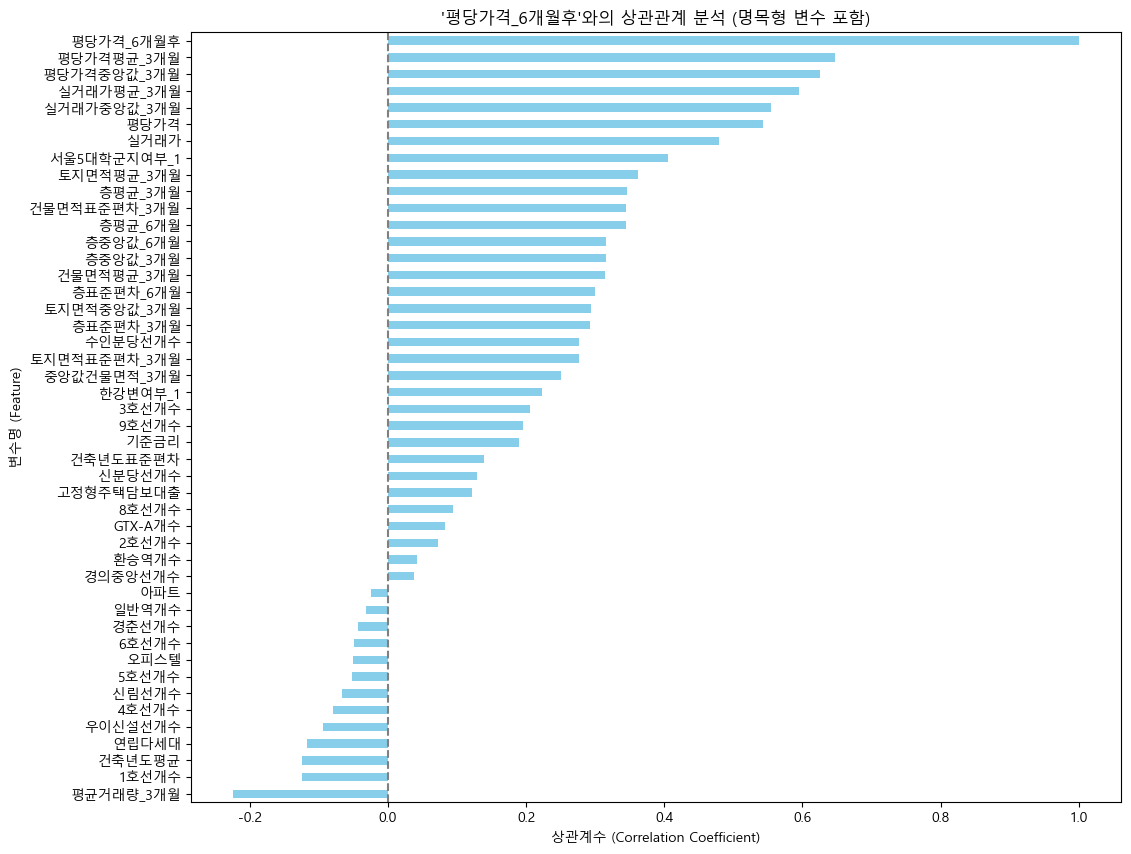

평당가격_6개월후       1.000000
평당가격평균_3개월      0.646839
평당가격중앙값_3개월     0.625402
실거래가평균_3개월      0.595352
실거래가중앙값_3개월     0.554987
평당가격            0.543389
실거래가            0.479644
서울5대학군지여부_1     0.405040
토지면적평균_3개월      0.362410
층평균_3개월         0.345571
건물면적표준편차_3개월    0.344342
층평균_6개월         0.344178
층중앙값_6개월        0.316181
층중앙값_3개월        0.315773
건물면적평균_3개월      0.314506
층표준편차_6개월       0.299810
토지면적중앙값_3개월     0.293767
층표준편차_3개월       0.293025
수인분당선개수         0.276693
토지면적표준편차_3개월    0.276422
중앙값건물면적_3개월     0.250017
한강변여부_1         0.223382
3호선개수           0.205210
9호선개수           0.195396
기준금리            0.190083
건축년도표준편차        0.138367
신분당선개수          0.128435
고정형주택담보대출       0.122034
8호선개수           0.094349
GTX-A개수         0.081915
2호선개수           0.072877
환승역개수           0.042355
경의중앙선개수         0.038246
아파트            -0.024211
일반역개수          -0.031912
경춘선개수          -0.043143
6호선개수          -0.049494
오피스텔           -0.050613
5호선개수          -0.052705
신림선개수          -0.066973


In [27]:

# 특정 변수('평당가격_6개월후')와의 상관관계가 높은 변수만 필터링 (0.02 이상 또는 -0.02 이하)
significant_correlation = target_correlation[(target_correlation >= 0.02) | (target_correlation <= -0.02)]

# 상관관계가 높은 변수들을 막대 그래프로 시각화
plt.figure(figsize=(12, 10))
significant_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("상관계수 (Correlation Coefficient)")
plt.ylabel("변수명 (Feature)")
plt.title("'평당가격_6개월후'와의 상관관계 분석 (명목형 변수 포함)")
plt.show()

# 상관계수가 높은 변수 출력
significant_correlation


# PCA 이후

6개월 후 평당가격과 상관관계가 높은 변수 (Top 10)
평당가격_6개월후       1.000000
평당가격_PCA_3개월    0.635881
실거래가평균_3개월      0.592088
실거래가중앙값_3개월     0.551730
평당가격            0.541161
실거래가            0.477476
서울5대학군지여부_1     0.403370
토지면적평균_3개월      0.361015
층평균_3개월         0.343931
층평균_6개월         0.342574
Name: 평당가격_6개월후, dtype: float64

6개월 후 평당가격과 상관관계가 낮은 변수 (Bottom 10)
6호선개수       -0.049157
오피스텔        -0.050437
5호선개수       -0.052949
신림선개수       -0.066178
4호선개수       -0.079192
우이신설선개수     -0.093523
연립다세대       -0.117348
건축년도평균      -0.122921
1호선개수       -0.124423
평균거래량_3개월   -0.223498
Name: 평당가격_6개월후, dtype: float64


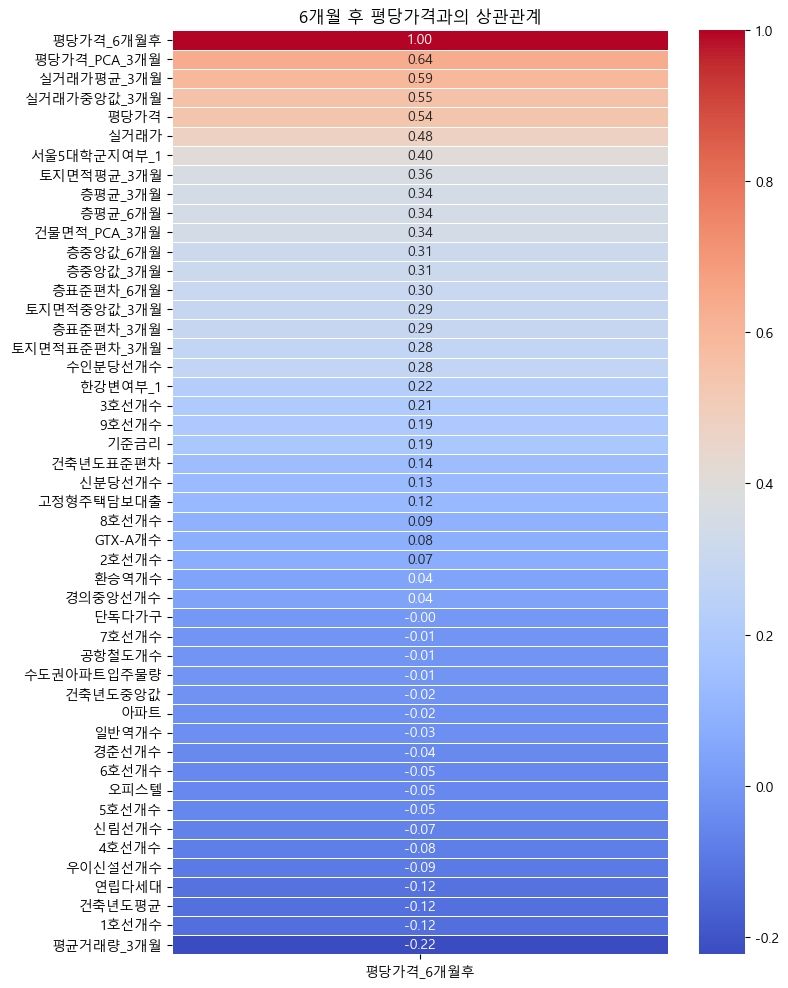

In [203]:
import seaborn as sns
import matplotlib.pyplot as plt


# 원-핫 인코딩된 변수 포함하여 상관 행렬 계산
correlation_with_price = selected_df.corr()["평당가격_6개월후"].sort_values(ascending=False)

# 상위 10개 & 하위 10개 변수 출력
top_10_corr = correlation_with_price.head(10)
bottom_10_corr = correlation_with_price.tail(10)

# 상관분석 결과 출력
print("6개월 후 평당가격과 상관관계가 높은 변수 (Top 10)")
print(top_10_corr)
print("\n6개월 후 평당가격과 상관관계가 낮은 변수 (Bottom 10)")
print(bottom_10_corr)

# 상관관계 시각화 (히트맵)
plt.figure(figsize=(8, 12))
sns.heatmap(correlation_with_price.to_frame(), annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")
plt.title("6개월 후 평당가격과의 상관관계")
plt.show()



In [205]:
correlation_with_price

평당가격_6개월후       1.000000
평당가격_PCA_3개월    0.635881
실거래가평균_3개월      0.592088
실거래가중앙값_3개월     0.551730
평당가격            0.541161
실거래가            0.477476
서울5대학군지여부_1     0.403370
토지면적평균_3개월      0.361015
층평균_3개월         0.343931
층평균_6개월         0.342574
건물면적_PCA_3개월    0.340712
층중앙값_6개월        0.314599
층중앙값_3개월        0.314295
층표준편차_6개월       0.298644
토지면적중앙값_3개월     0.292556
층표준편차_3개월       0.291755
토지면적표준편차_3개월    0.275803
수인분당선개수         0.275255
한강변여부_1         0.223002
3호선개수           0.205040
9호선개수           0.194299
기준금리            0.187593
건축년도표준편차        0.137411
신분당선개수          0.128858
고정형주택담보대출       0.121544
8호선개수           0.094201
GTX-A개수         0.081508
2호선개수           0.073299
환승역개수           0.042465
경의중앙선개수         0.038030
단독다가구          -0.001676
7호선개수          -0.008841
공항철도개수         -0.009033
수도권아파트입주물량     -0.012356
건축년도중앙값        -0.015764
아파트            -0.024187
일반역개수          -0.031922
경춘선개수          -0.043804
6호선개수          -0.049157
오피스텔           -0.050437


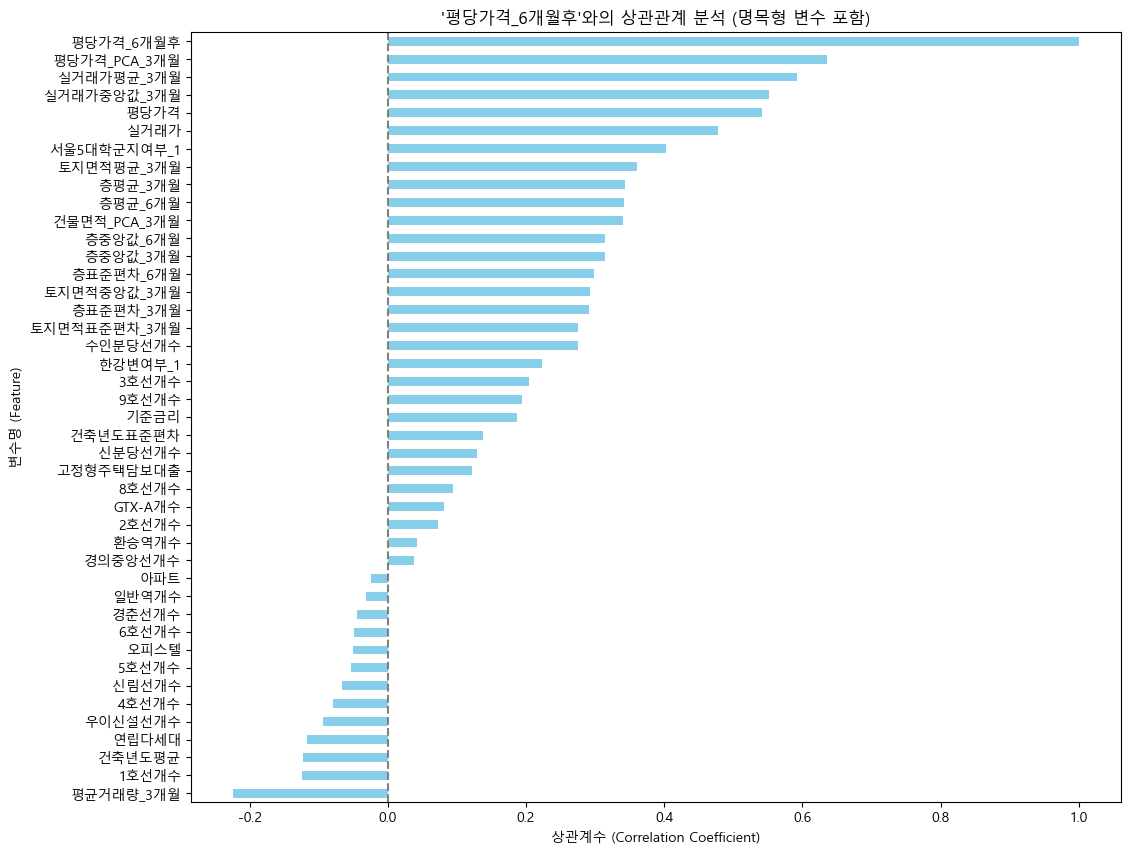

평당가격_6개월후       1.000000
평당가격_PCA_3개월    0.635881
실거래가평균_3개월      0.592088
실거래가중앙값_3개월     0.551730
평당가격            0.541161
실거래가            0.477476
서울5대학군지여부_1     0.403370
토지면적평균_3개월      0.361015
층평균_3개월         0.343931
층평균_6개월         0.342574
건물면적_PCA_3개월    0.340712
층중앙값_6개월        0.314599
층중앙값_3개월        0.314295
층표준편차_6개월       0.298644
토지면적중앙값_3개월     0.292556
층표준편차_3개월       0.291755
토지면적표준편차_3개월    0.275803
수인분당선개수         0.275255
한강변여부_1         0.223002
3호선개수           0.205040
9호선개수           0.194299
기준금리            0.187593
건축년도표준편차        0.137411
신분당선개수          0.128858
고정형주택담보대출       0.121544
8호선개수           0.094201
GTX-A개수         0.081508
2호선개수           0.073299
환승역개수           0.042465
경의중앙선개수         0.038030
아파트            -0.024187
일반역개수          -0.031922
경춘선개수          -0.043804
6호선개수          -0.049157
오피스텔           -0.050437
5호선개수          -0.052949
신림선개수          -0.066178
4호선개수          -0.079192
우이신설선개수        -0.093523
연립다세대          -0.117348


In [207]:

# 특정 변수('평당가격_6개월후')와의 상관관계가 높은 변수만 필터링 (0.02 이상 또는 -0.02 이하)
significant_correlation = target_correlation[(target_correlation >= 0.02) | (target_correlation <= -0.02)]

# 상관관계가 높은 변수들을 막대 그래프로 시각화
plt.figure(figsize=(12, 10))
significant_correlation.sort_values().plot(kind='barh', color='skyblue')
plt.axvline(x=0, color='gray', linestyle='--')
plt.xlabel("상관계수 (Correlation Coefficient)")
plt.ylabel("변수명 (Feature)")
plt.title("'평당가격_6개월후'와의 상관관계 분석 (명목형 변수 포함)")
plt.show()

# 상관계수가 높은 변수 출력
significant_correlation


In [43]:
# 절댓값 0.2 이상
significant_columns = [
    "평당가격평균_3개월", "평당가격중앙값_3개월", "실거래가평균_3개월", "실거래가중앙값_3개월",  
    "평당가격", "실거래가", "서울5대학군지여부_1", "토지면적평균_3개월", "층평균_3개월", "건물면적표준편차_3개월",  
    "층평균_6개월", "층중앙값_6개월", "층중앙값_3개월", "건물면적평균_3개월", "층표준편차_6개월", "토지면적중앙값_3개월",  
    "층표준편차_3개월", "수인분당선개수", "토지면적표준편차_3개월", "중앙값건물면적_3개월", "한강변여부_1",  
    "3호선개수", "평균거래량_3개월"
]



In [45]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산할 데이터셋 (NaN 제거 & float 변환)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF 정렬하여 출력
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("📌 다중공선성(VIF) 분석 결과:")
print(vif_data)


📌 다중공선성(VIF) 분석 결과:
         Feature         VIF
10       층평균_6개월  678.728309
8        층평균_3개월  580.387207
14     층표준편차_6개월  279.792773
13    건물면적평균_3개월  238.326454
16     층표준편차_3개월  236.841320
0     평당가격평균_3개월  230.160558
7     토지면적평균_3개월  200.136734
1    평당가격중앙값_3개월  186.227005
11      층중앙값_6개월  185.941461
12      층중앙값_3개월  155.012646
19   중앙값건물면적_3개월  143.102108
15   토지면적중앙값_3개월  123.536475
2     실거래가평균_3개월   89.978581
3    실거래가중앙값_3개월   60.126186
9   건물면적표준편차_3개월   28.674178
4           평당가격   20.417640
5           실거래가    8.673908
18  토지면적표준편차_3개월    8.586852
22     평균거래량_3개월    2.138998
6    서울5대학군지여부_1    1.990022
20       한강변여부_1    1.485087
17       수인분당선개수    1.316217
21         3호선개수    1.295192


In [46]:
# VIF값 10 이상인 컬럼들 제거 & 층, 건물면적, 평당가격 컬럼 하나만 남기기
significant_columns = ["실거래가", "토지면적표준편차_3개월", "서울5대학군지여부_1", "평균거래량_3개월",
                        "3호선개수", "한강변여부_1", "수인분당선개수", "층평균_6개월", "건물면적표준편차_3개월"]


# VIF 계산할 데이터셋 (NaN 제거 & float 변환)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF 정렬하여 출력
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("📌 다중공선성(VIF) 분석 결과:")
print(vif_data)


📌 다중공선성(VIF) 분석 결과:
        Feature        VIF
8  건물면적표준편차_3개월  12.146786
7       층평균_6개월   7.253503
1  토지면적표준편차_3개월   5.389567
0          실거래가   3.453284
3     평균거래량_3개월   1.799550
2   서울5대학군지여부_1   1.668232
5       한강변여부_1   1.352664
4         3호선개수   1.275777
6       수인분당선개수   1.233097


-> pca

### PCA 후

In [214]:
# 절댓값 0.2 이상
significant_columns = [
    '평당가격_PCA_3개월', '실거래가평균_3개월', '실거래가중앙값_3개월', 
    '실거래가', '서울5대학군지여부_1', '토지면적평균_3개월', '층평균_3개월', 
    '층평균_6개월', '건물면적_PCA_3개월', '층중앙값_6개월', '층중앙값_3개월', 
    '층표준편차_6개월', '토지면적중앙값_3개월', '층표준편차_3개월', '토지면적표준편차_3개월', 
    '수인분당선개수', '한강변여부_1', '3호선개수', '평균거래량_3개월'
]


In [216]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# VIF 계산할 데이터셋 (NaN 제거 & float 변환)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF 정렬하여 출력
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("📌 다중공선성(VIF) 분석 결과:")
print(vif_data)


📌 다중공선성(VIF) 분석 결과:
         Feature         VIF
7        층평균_6개월  679.229467
6        층평균_3개월  581.124834
11     층표준편차_6개월  278.640397
13     층표준편차_3개월  236.777922
9       층중앙값_6개월  185.910352
5     토지면적평균_3개월  170.062384
10      층중앙값_3개월  155.100520
12   토지면적중앙값_3개월  119.381595
1     실거래가평균_3개월   78.199077
2    실거래가중앙값_3개월   36.269762
0   평당가격_PCA_3개월   10.541558
14  토지면적표준편차_3개월    8.243742
3           실거래가    5.574302
18     평균거래량_3개월    2.331023
8   건물면적_PCA_3개월    2.320216
4    서울5대학군지여부_1    1.893036
16       한강변여부_1    1.475027
15       수인분당선개수    1.313016
17         3호선개수    1.287169


In [222]:
# VIF값 10 이상인 컬럼들 제거 & 층 하나만 남기기
significant_columns = [
    '토지면적표준편차_3개월', '실거래가', '평균거래량_3개월',
    '건물면적_PCA_3개월', '서울5대학군지여부_1', '한강변여부_1', '수인분당선개수', '3호선개수', "층평균_6개월"
]

# VIF 계산할 데이터셋 (NaN 제거 & float 변환)
df_vif = df_encoded[significant_columns].dropna().astype(float)

# VIF 계산
vif_data = pd.DataFrame()
vif_data["Feature"] = significant_columns
vif_data["VIF"] = [variance_inflation_factor(df_vif.values, i) for i in range(len(significant_columns))]

# VIF 정렬하여 출력
vif_data = vif_data.sort_values(by="VIF", ascending=False)
print("📌 다중공선성(VIF) 분석 결과:")
print(vif_data)


📌 다중공선성(VIF) 분석 결과:
        Feature       VIF
8       층평균_6개월  4.995894
0  토지면적표준편차_3개월  3.926417
1          실거래가  3.871868
2     평균거래량_3개월  1.814030
4   서울5대학군지여부_1  1.623716
3  건물면적_PCA_3개월  1.499413
5       한강변여부_1  1.347939
7         3호선개수  1.275782
6       수인분당선개수  1.230877


In [ ]:
### 

In [83]:
import statsmodels.api as sm
import numpy as np

# 독립변수 (설명변수)와 종속변수 (목표변수) 설정
X = selected_df.drop(columns=['평당가격_6개월후'])  # 종속변수를 제외한 나머지 변수들 사용
y = selected_df['평당가격_6개월후']  # 종속변수

# 결측치(NaN) 및 무한대(inf) 값 처리
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # inf 값을 NaN으로 변환
X.dropna(inplace=True)  # NaN 값 제거
y = y.loc[X.index]  # X의 변경된 인덱스에 맞게 y도 조정

# 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# OLS 모델 생성 및 적합 (fit)
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:              평당가격_6개월후   R-squared:                       0.445
Model:                            OLS   Adj. R-squared:                  0.445
Method:                 Least Squares   F-statistic:                     7600.
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:47:50   Log-Likelihood:            -4.0868e+06
No. Observations:              474086   AIC:                         8.174e+06
Df Residuals:                  474035   BIC:                         8.174e+06
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -370.8683    239.749     -1.547   

In [85]:

# 선택된 유의미한 변수 목록
selected_features = [
    "평당가격", "평당가격평균_3개월", "실거래가평균_3개월",
    "환승역개수", "일반역개수", "2호선개수", "3호선개수", "8호선개수", "수인분당선개수",
    "기준금리", "고정형주택담보대출", "서울5대학군지여부_1", "한강변여부_1",
    "건축년도평균", "층표준편차_6개월"
]


# 결측치(NaN) 및 무한대(inf) 값 처리
selected_df = selected_df.replace([np.inf, -np.inf], np.nan).dropna(subset=selected_features + ['평당가격_6개월후'])

# 독립변수(X)와 종속변수(y) 설정
X = selected_df[selected_features]
y = selected_df['평당가격_6개월후']

# 상수항 추가
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              평당가격_6개월후   R-squared:                       0.438
Model:                            OLS   Adj. R-squared:                  0.438
Method:                 Least Squares   F-statistic:                 2.464e+04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        20:49:25   Log-Likelihood:            -4.0960e+06
No. Observations:              474797   AIC:                         8.192e+06
Df Residuals:                  474781   BIC:                         8.192e+06
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1504.9305    110.500     13.619      

In [271]:
import statsmodels.api as sm
import numpy as np

# selected_df가 정의되어 있어야 함
# 선택된 유의미한 변수 목록
selected_features2 = [
    '기준금리', '고정형주택담보대출', '평당가격평균_3개월', '서울5대학군지여부_1', '한강변여부_1',
    '8호선개수', '수인분당선개수', '공항철도개수',
    '건물면적평균_3개월', '토지면적평균_3개월', '층중앙값_6개월'
]

# 결측치(NaN) 및 무한대(inf) 값 처리
selected_df = selected_df.replace([np.inf, -np.inf], np.nan).dropna(subset=selected_features2 + ['평당가격_6개월후'])

# 독립변수(X)와 종속변수(y) 설정
X = selected_df[selected_features2]
y = selected_df['평당가격_6개월후']

# 상수항 추가
X = sm.add_constant(X)

# OLS 모델 적합
model = sm.OLS(y, X).fit()

# 결과 출력
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:              평당가격_6개월후   R-squared:                       0.436
Model:                            OLS   Adj. R-squared:                  0.436
Method:                 Least Squares   F-statistic:                 3.342e+04
Date:                Mon, 24 Feb 2025   Prob (F-statistic):               0.00
Time:                        17:43:26   Log-Likelihood:            -4.1012e+06
No. Observations:              475336   AIC:                         8.202e+06
Df Residuals:                  475324   BIC:                         8.203e+06
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const        1501.1874     18.465     81.299      

### PCA 후 상관분석 -> VIF -> OLS

In [231]:
df_encoded['평당가격_6개월후']

0                 NaN
1                 NaN
2                 NaN
3                 NaN
4                 NaN
             ...     
515078    3223.498827
515079    1621.315200
515080    2739.342040
515081    2935.884250
515082    2935.884250
Name: 평당가격_6개월후, Length: 515083, dtype: float64

In [233]:
import statsmodels.api as sm
import numpy as np
import pandas as pd

# 독립변수 (설명변수)와 종속변수 (목표변수) 설정
X = df_encoded[significant_columns]
y = df_encoded['평당가격_6개월후']

# 1. 결측치(NaN) 및 무한대(inf) 값 처리
X.replace([np.inf, -np.inf], np.nan, inplace=True)  # inf 값을 NaN으로 변환
y.replace([np.inf, -np.inf], np.nan, inplace=True)  # y도 동일한 처리

# 2. X와 y에서 NaN이 있는 행 제거
df_clean = pd.concat([X, y], axis=1).dropna()  # X와 y를 합친 후 NaN이 포함된 행 삭제
X = df_clean[significant_columns]
y = df_clean['평당가격_6개월후']

# 3. 모든 컬럼이 동일한 값으로 채워진 경우 제거
X = X.loc[:, (X != X.iloc[0]).any()]  # 모든 값이 동일한 컬럼 제거

# 4. 데이터 스케일 확인 (이상값 확인)
print("최대값:", X.max().max(), "최소값:", X.min().min())

# 5. 상수항 추가 (절편 포함)
X = sm.add_constant(X)

# 6. OLS 모델 생성 및 적합 (fit)
model = sm.OLS(y, X).fit()

# 7. 결과 출력
print(model.summary())


C:\Users\user\AppData\Local\Temp\ipykernel_6780\3380094135.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X.replace([np.inf, -np.inf], np.nan, inplace=True)  # inf 값을 NaN으로 변환


최대값: 2200000.0 최소값: -4.939414274695653
                            OLS Regression Results                            
Dep. Variable:              평당가격_6개월후   R-squared:                       0.348
Model:                            OLS   Adj. R-squared:                  0.348
Method:                 Least Squares   F-statistic:                 2.824e+04
Date:                Tue, 25 Feb 2025   Prob (F-statistic):               0.00
Time:                        00:25:41   Log-Likelihood:            -4.1445e+06
No. Observations:              476379   AIC:                         8.289e+06
Df Residuals:                  476369   BIC:                         8.289e+06
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const    

In [ ]:
# 최종선택변수

In [235]:
significant_columns

['토지면적표준편차_3개월',
 '실거래가',
 '평균거래량_3개월',
 '건물면적_PCA_3개월',
 '서울5대학군지여부_1',
 '한강변여부_1',
 '수인분당선개수',
 '3호선개수',
 '층평균_6개월']

In [107]:
df_encoded.to_pickle("C:/ZIPcoding/encoded_df_0224.pkl")